# Group Project: Arxiv Classifier
Authors: Amir Yunus, Brandon Gay, Lee Oon Teng

In [1]:
from utils import load_data, split_data, save_model
from utils.architecture.shallow_artificial_neural_network import ShallowNeuralNetwork
import pandas as pd

# 16 - $M_{10}$: Hyperparameter Search for Shallow Artificial Neural Network with Balanced Dataset


## 16.1 - Load the Data

In [2]:
filename = 'arxiv_balanced'
df = load_data(f'../data/03_{filename}_engineered.bin')
df.shape

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,-0.340067,0.275288,0.076594,-0.272523,-0.307306,0.349464,0.359581,0.885010,-0.355955,-0.056723,...,0.500000,0.487771,0.444444,0.5,1.0,0.0,1.0,1.000000,physics,train
1,-0.115177,0.081050,0.103687,-0.238543,-0.431923,0.210272,0.157446,0.632112,-0.503011,-0.071692,...,0.500000,0.510417,0.444444,0.5,1.0,0.0,1.0,1.000000,physics,test
2,-0.392568,0.203008,0.196116,-0.296451,-0.194015,0.356909,0.407645,0.766410,-0.616156,0.025784,...,0.500000,0.513417,0.444444,0.5,1.0,0.0,1.0,0.483682,physics,train
3,-0.289894,0.239780,0.322290,-0.115017,0.041579,0.528063,0.223974,0.722394,-0.309294,0.099875,...,0.583333,0.546528,0.444444,0.5,1.0,0.0,1.0,0.860251,physics,val
4,-0.020201,0.345040,-0.169287,-0.099256,-0.514406,0.056388,0.380709,0.664660,-0.537006,-0.179937,...,0.500000,0.554500,0.444444,0.5,1.0,0.0,1.0,0.651046,physics,train


(40586, 3158)

## 16.2 - Split the Data

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, balance_data = True)

Train set: 13264 samples
Validation set: 5768 samples
Test set: 2120 samples

Samples per category after balancing:

Train set:
category
physics                                       1658
computer science                              1658
mathematics                                   1658
quantitative biology                          1658
quantitative finance                          1658
electrical engineering and systems science    1658
economics                                     1658
statistics                                    1658
Name: count, dtype: int64

Validation set:
category
physics                                       721
computer science                              721
mathematics                                   721
quantitative biology                          721
quantitative finance                          721
electrical engineering and systems science    721
economics                                     721
statistics                                    721
Nam

## 16.3 - Hyperparameter Search

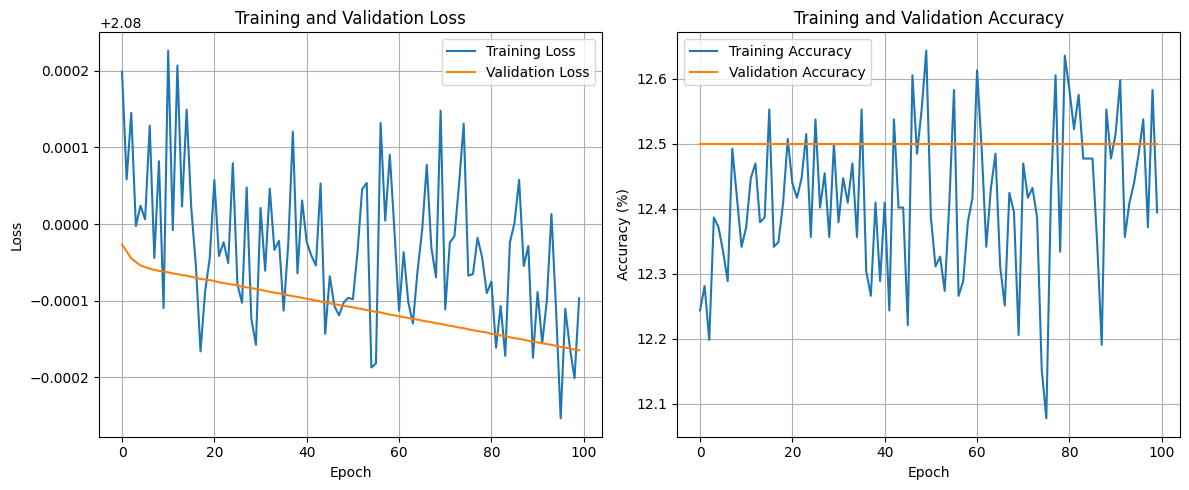

Training: 100%|██████████| 100/100 [01:19<00:00,  1.26it/s, train_loss=2.0799, val_loss=2.0798, train_acc=12.39%, val_acc=12.50%]



Grid Search Results:
--------------------------------------------------
hidden_dim: 256, learning_rate: 0.001, val_loss: 1.5293
hidden_dim: 128, learning_rate: 0.001, val_loss: 1.5434
hidden_dim: 512, learning_rate: 0.001, val_loss: 1.5449
hidden_dim: 128, learning_rate: 0.01, val_loss: 1.5499
hidden_dim: 64, learning_rate: 0.01, val_loss: 1.6021
hidden_dim: 64, learning_rate: 0.001, val_loss: 1.6084
hidden_dim: 2056, learning_rate: 0.0001, val_loss: 1.6123
hidden_dim: 32, learning_rate: 0.001, val_loss: 1.6418
hidden_dim: 1024, learning_rate: 0.0001, val_loss: 1.6513
hidden_dim: 16, learning_rate: 0.01, val_loss: 1.6834
hidden_dim: 16, learning_rate: 0.001, val_loss: 1.6909
hidden_dim: 512, learning_rate: 0.0001, val_loss: 1.6964
hidden_dim: 1024, learning_rate: 0.001, val_loss: 1.7233
hidden_dim: 256, learning_rate: 0.0001, val_loss: 1.7730
hidden_dim: 8, learning_rate: 0.001, val_loss: 1.8112
hidden_dim: 128, learning_rate: 0.0001, val_loss: 1.8372
hidden_dim: 256, learning_rate: 0

In [4]:
# Define hyperparameter grid
hidden_dims = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1_024, 2_056]
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

# Initialize tracking variables
best_val_loss = float('inf')
best_params = {}
results = []

# Perform grid search
for hidden_dim in hidden_dims:
    for lr in learning_rates:
        print(f"\nTrying hidden_dim={hidden_dim}, learning_rate={lr}")
        
        # Initialize and train model
        m10_model = ShallowNeuralNetwork(
            input_dim=X_train.shape[1],
            hidden_dim=hidden_dim,
            learning_rate=lr
        )
        
        train_loss, val_loss = m10_model.fit(
            X_train, y_train,
            X_val, y_val,
            batch_size = 20_000
        )
        
        # Track results
        final_val_loss = val_loss[-1]
        results.append({
            'hidden_dim': hidden_dim,
            'learning_rate': lr,
            'val_loss': final_val_loss
        })
        
        # Update best parameters if we found better ones
        if final_val_loss < best_val_loss:
            best_val_loss = final_val_loss
            best_params = {
                'hidden_dim': hidden_dim,
                'learning_rate': lr
            }

print("\nGrid Search Results:")
print("-" * 50)
for result in sorted(results, key=lambda x: x['val_loss']):
    print(f"hidden_dim: {result['hidden_dim']}, "
          f"learning_rate: {result['learning_rate']}, "
          f"val_loss: {result['val_loss']:.4f}")

print("\nBest Parameters:")
print(f"hidden_dim: {best_params['hidden_dim']}")
print(f"learning_rate: {best_params['learning_rate']}")
print(f"Best validation loss: {best_val_loss:.4f}")

## 16.4 - Evaluate the Model

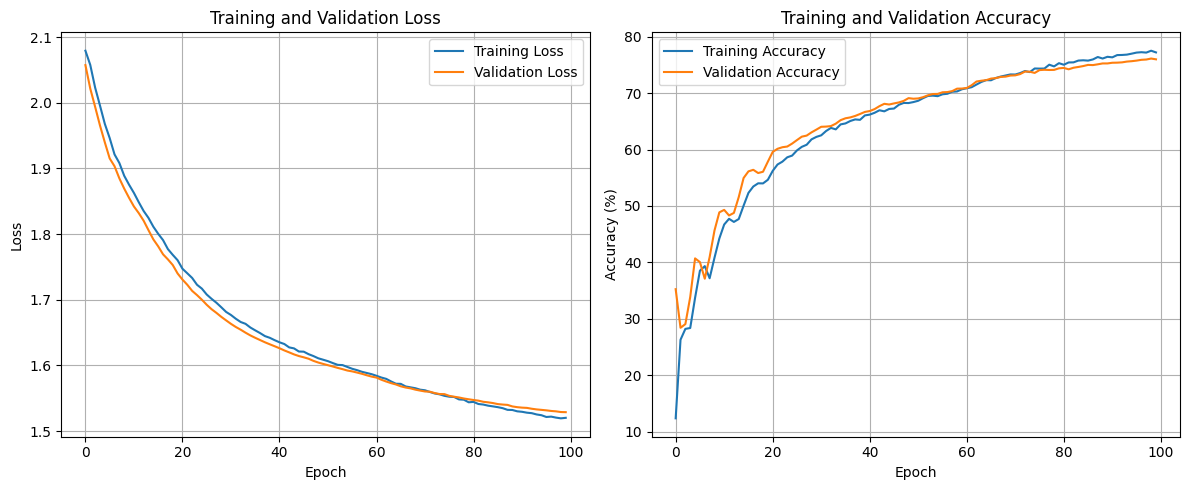

Training: 100%|██████████| 100/100 [01:13<00:00,  1.36it/s, train_loss=1.5203, val_loss=1.5289, train_acc=77.23%, val_acc=76.01%]


In [5]:
m10_model = ShallowNeuralNetwork(
    input_dim=X_train.shape[1],
    hidden_dim=best_params['hidden_dim'],
    learning_rate=best_params['learning_rate']
)
_,_ = m10_model.fit(X_train, y_train, X_val, y_val, batch_size = 20_000)


Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.74      0.64      0.69       265
                                 economics       0.62      0.67      0.64       265
electrical engineering and systems science       0.81      0.88      0.84       265
                               mathematics       0.86      0.82      0.84       265
                                   physics       0.94      0.97      0.96       265
                      quantitative biology       0.78      0.85      0.81       265
                      quantitative finance       0.72      0.73      0.72       265
                                statistics       0.66      0.59      0.62       265

                                  accuracy                           0.77      2120
                                 macro avg       0.77      0.77      0.77      2120
                              weighted avg       0

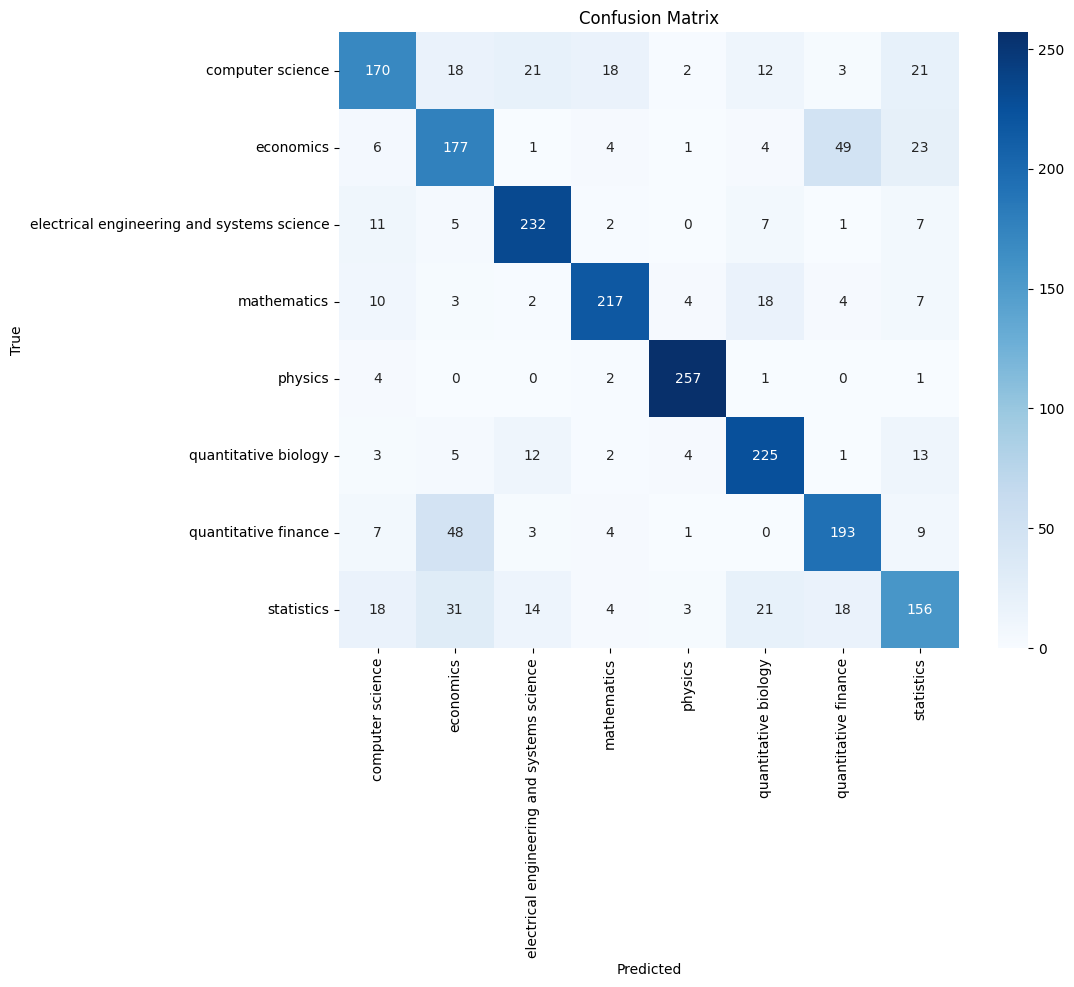

In [6]:
m10_model.predict(X_test, y_test)

## 16.5 - Save the Model

In [7]:
save_model(m10_model, '../models/m10_search_ann.bin')

Model saved successfully to ../models/m10_search_ann.bin


## 16.6 - Evaluate with Imbalanced Dataset

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,-0.316280,0.338162,0.180578,-0.086113,-0.247716,0.640725,0.333832,0.832219,-0.262952,0.072209,...,0.600000,0.451058,0.50,0.5,1.0,1.0,1.0,1.0,physics,train
1,-0.271645,0.228114,0.203795,-0.257775,-0.083051,0.499957,0.471172,0.737172,-0.135142,0.213080,...,0.530556,0.406599,0.50,0.5,1.0,1.0,1.0,1.0,physics,train
2,-0.380401,0.264061,0.162928,-0.187630,-0.171296,0.660988,0.372280,0.938673,-0.259530,-0.110329,...,0.608333,0.529045,0.70,0.5,1.0,1.0,1.0,1.0,physics,train
3,-0.496275,0.129620,0.048845,0.000629,-0.320589,0.458095,0.439276,0.694186,-0.358091,-0.272360,...,0.312500,0.441523,0.65,0.5,1.0,1.0,1.0,1.0,mathematics,train
4,-0.163396,0.336321,0.343406,-0.162484,-0.134234,0.729687,0.424456,0.891292,-0.304655,0.020353,...,0.490000,0.472394,0.50,0.5,1.0,1.0,1.0,1.0,physics,train


Train set: 37142 samples
Validation set: 15795 samples
Test set: 5879 samples

Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.51      0.30      0.38      1258
                                 economics       0.05      0.64      0.09        25
electrical engineering and systems science       0.14      0.64      0.23       142
                               mathematics       0.68      0.79      0.73      1353
                                   physics       0.97      0.35      0.52      2679
                      quantitative biology       0.15      0.73      0.25       201
                      quantitative finance       0.37      0.81      0.51        90
                                statistics       0.17      0.52      0.26       131

                                  accuracy                           0.47      5879
                                 macro avg       0.38   

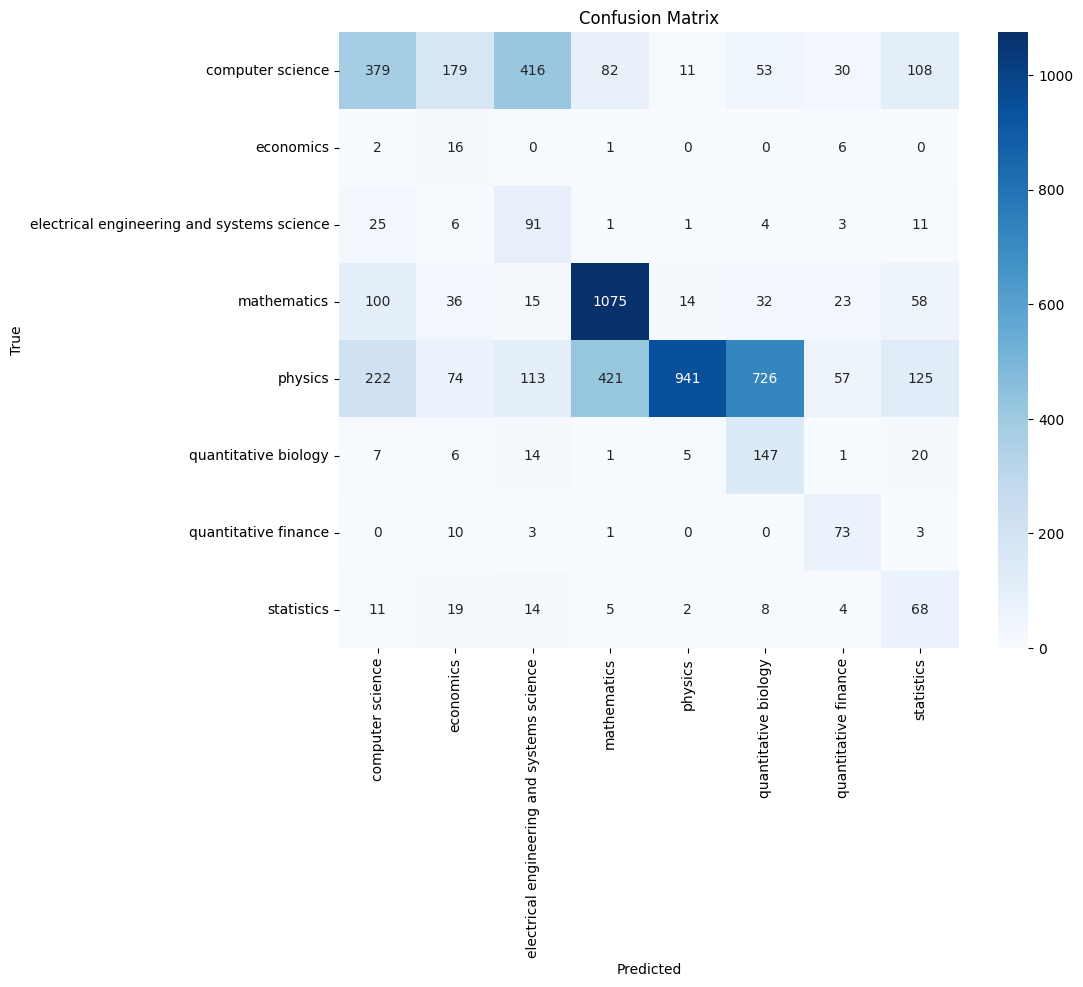

In [8]:
df_imbalanced = load_data(f'../data/03_arxiv_engineered.bin')
_, _, X_test_imblanced, _, _, y_test_imbalanced = split_data(df_imbalanced)
m10_model.predict(X_test_imblanced, y_test_imbalanced)